<a href="https://colab.research.google.com/github/devroopsaha744/leetode-contest-rating-prediction/blob/main/Leetcode_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [99]:
df = pd.read_csv("/content/drive/MyDrive/table_data.csv")

In [100]:
df.head()

,Rank,Name,Score,ratingChange,prevRank,prevRating,attemptedContest
0,1,twitch_tv_qiqi_impact,19,128.41600000000017,1,3047.239,126
1,2,AntonRaichuk,19,78.37300000000005,2,3262.606,96
2,5,yangxm,19,88.72600000000011,5,2986.656,96
3,6,lucasschnee,19,204.86099999999988,6,2120.406,26
4,7,megaspazz,19,68.5340000000001,7,3059.811,305


In [101]:
df.shape

(2418, 7)

In [102]:
df = df.drop(['Name'], axis = 1)

In [103]:
df.isnull().sum()

Rank                0
Score               0
ratingChange        0
prevRank            0
prevRating          0
attemptedContest    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              2418 non-null   object
 1   Score             2418 non-null   object
 2   ratingChange      2418 non-null   object
 3   prevRank          2418 non-null   object
 4   prevRating        2418 non-null   object
 5   attemptedContest  2418 non-null   object
dtypes: object(6)
memory usage: 113.5+ KB


In [105]:
df = df.drop(1751)   #One problematic row

In [106]:
cols = df.columns
for var in cols:
  df[var] = pd.to_numeric(df[var])


df

,Rank,Score,ratingChange,prevRank,prevRating,attemptedContest
0,1,19,128.416,1,3047.239,126
1,2,19,78.373,2,3262.606,96
2,5,19,88.726,5,2986.656,96
3,6,19,204.861,6,2120.406,26
4,7,19,68.534,7,3059.811,305
...,...,...,...,...,...,...
2413,920,12,19.688,920,2119.331,67
2414,921,12,27.256,921,2060.612,18
2415,922,12,15.685,2330,1918.750,19
2416,923,12,20.295,859,2179.932,137


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 0 to 2417
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              2417 non-null   int64  
 1   Score             2417 non-null   int64  
 2   ratingChange      2417 non-null   float64
 3   prevRank          2417 non-null   int64  
 4   prevRating        2417 non-null   float64
 5   attemptedContest  2417 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 132.2 KB


In [108]:
sns.set()

<Axes: xlabel='attemptedContest'>

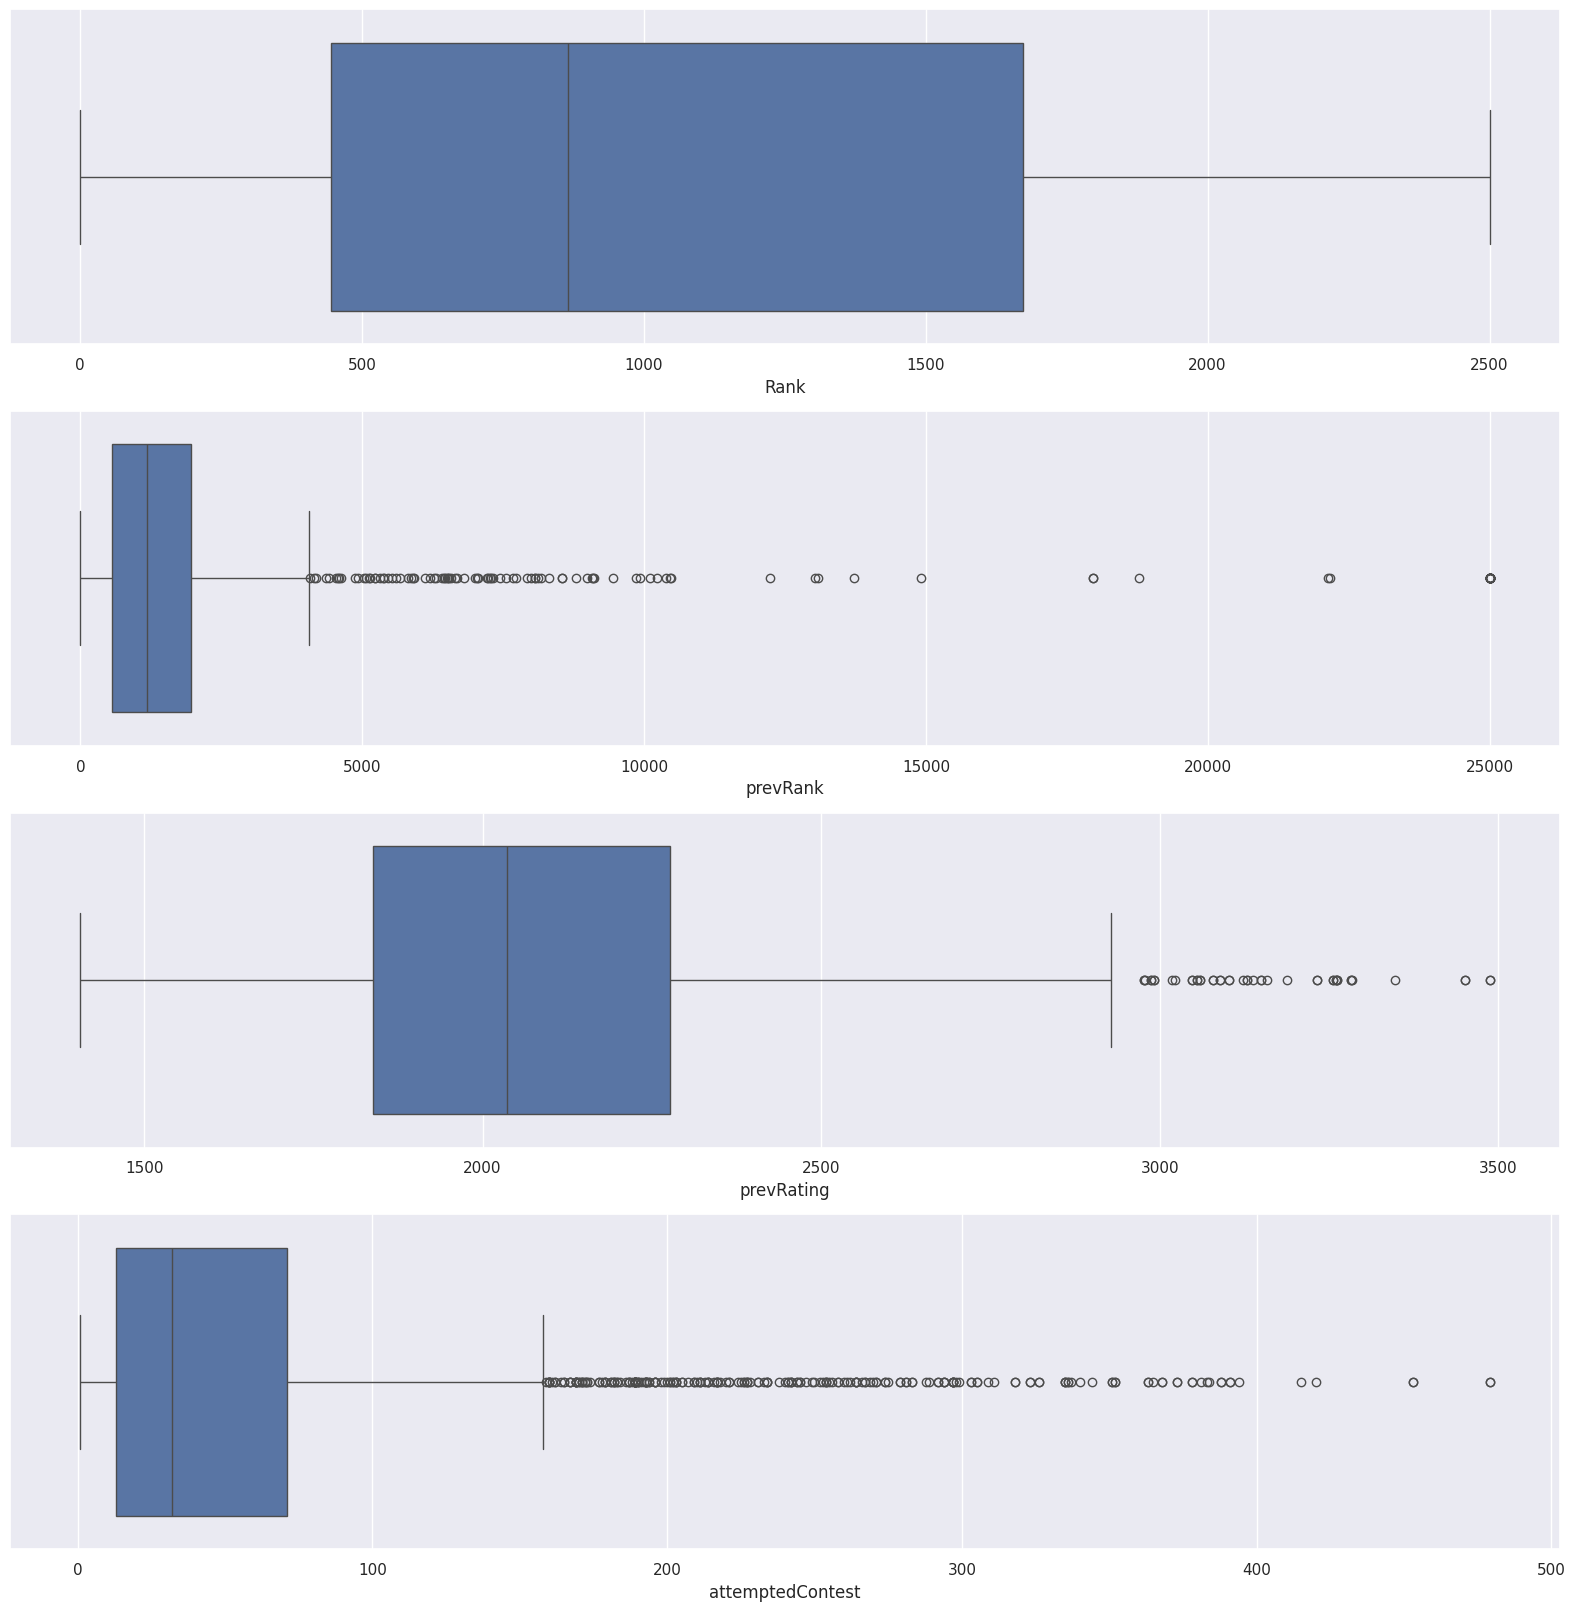

In [109]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.boxplot(x = 'Rank', data = df, ax = axes[0])
sns.boxplot(x = 'prevRank', data = df, ax = axes[1])
sns.boxplot(x = 'prevRating', data = df, ax = axes[2])
sns.boxplot(x = 'attemptedContest', data = df, ax = axes[3])

<Axes: xlabel='attemptedContest', ylabel='Density'>

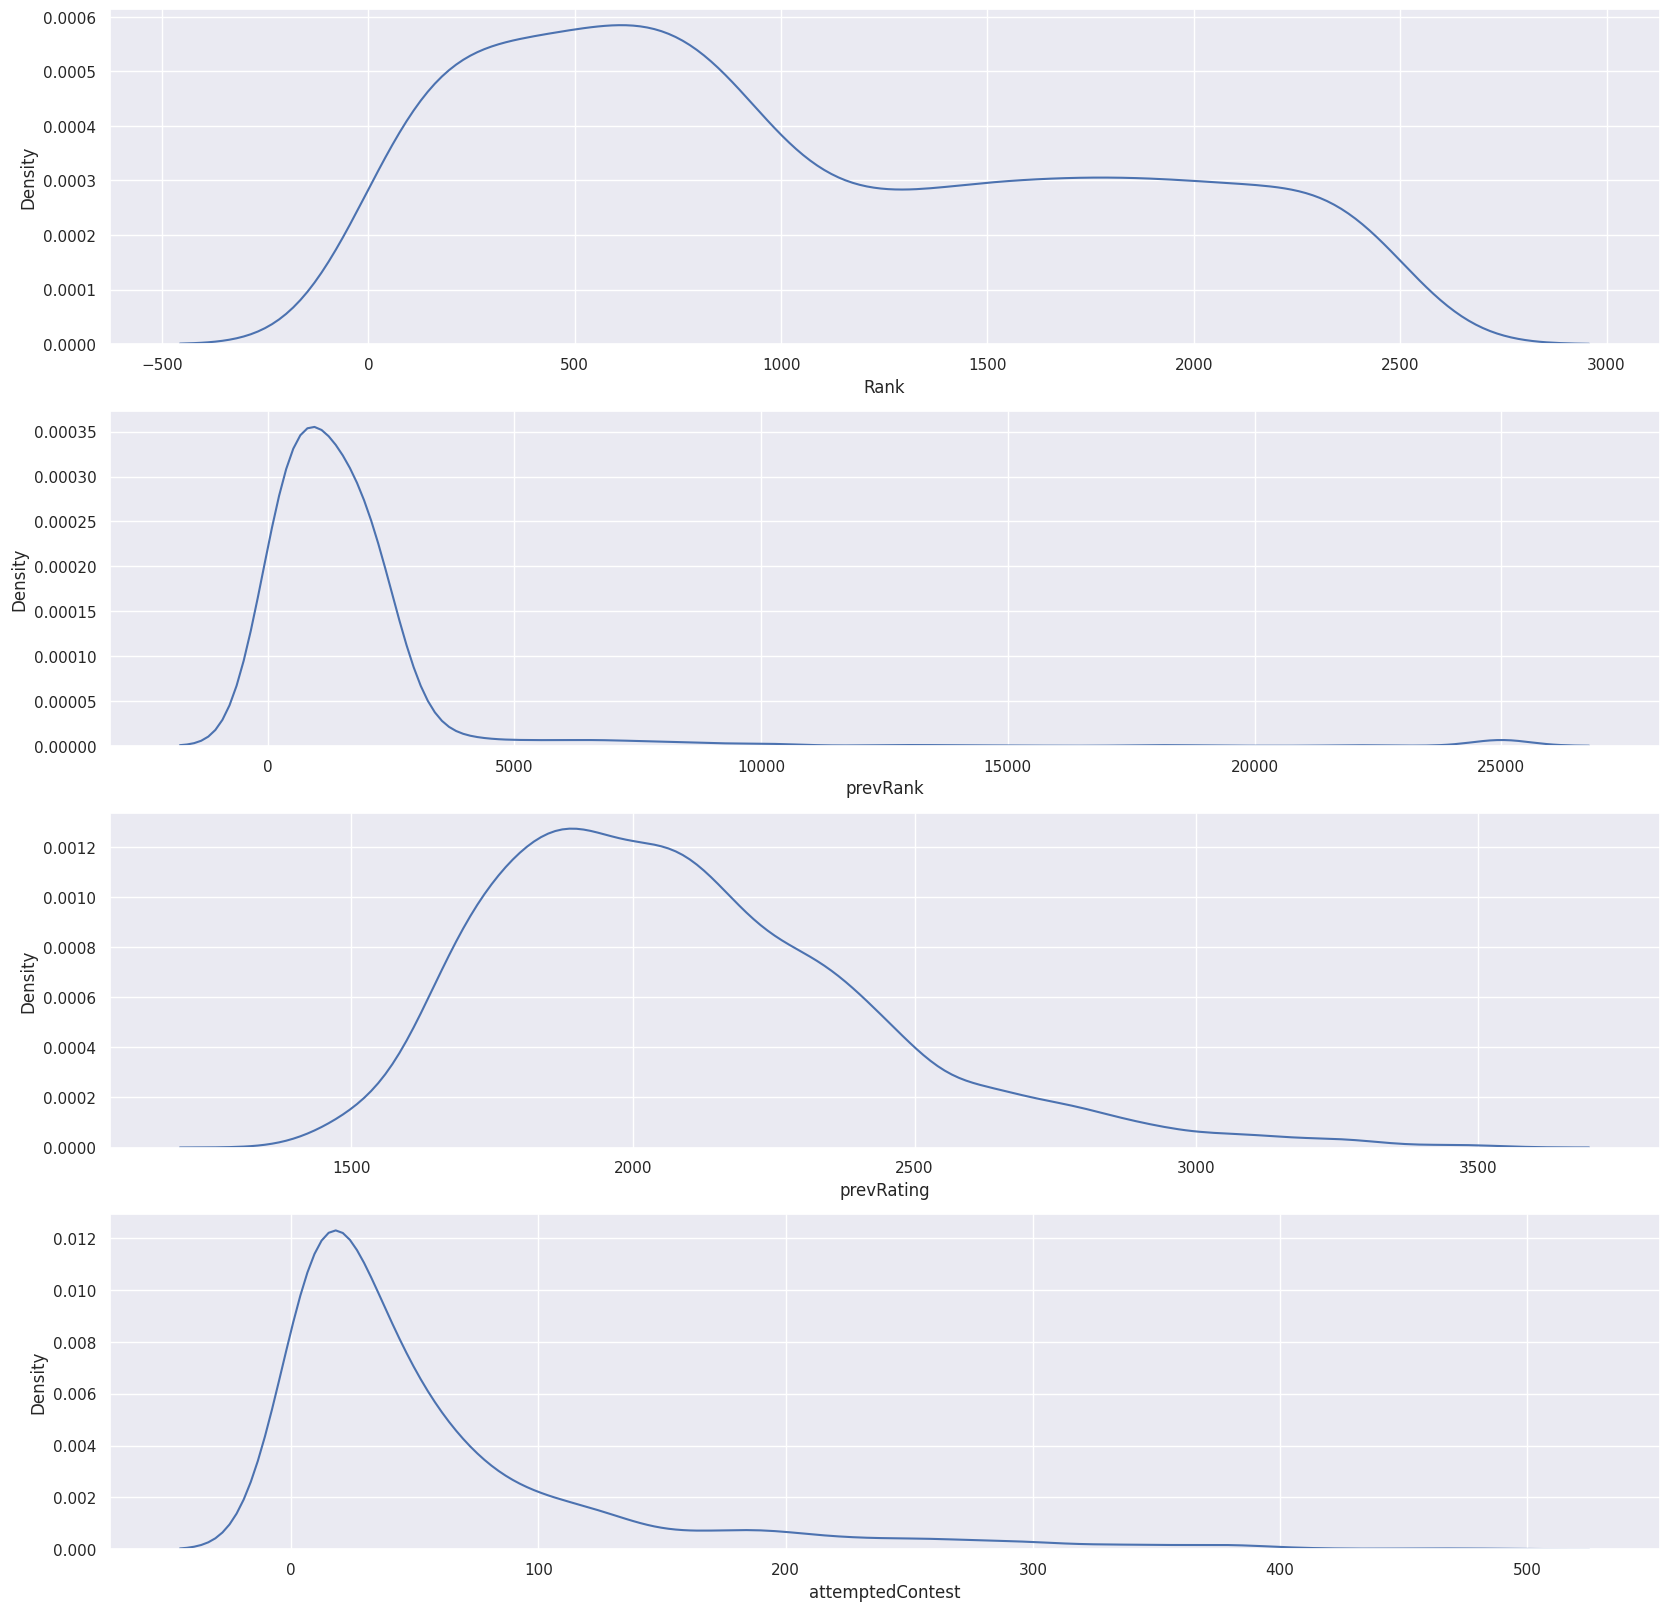

In [110]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.kdeplot(x = 'Rank', data = df, ax = axes[0])
sns.kdeplot(x = 'prevRank', data = df, ax = axes[1])
sns.kdeplot(x = 'prevRating', data = df, ax = axes[2])
sns.kdeplot(x = 'attemptedContest', data = df, ax = axes[3])

<Axes: xlabel='attemptedContest'>

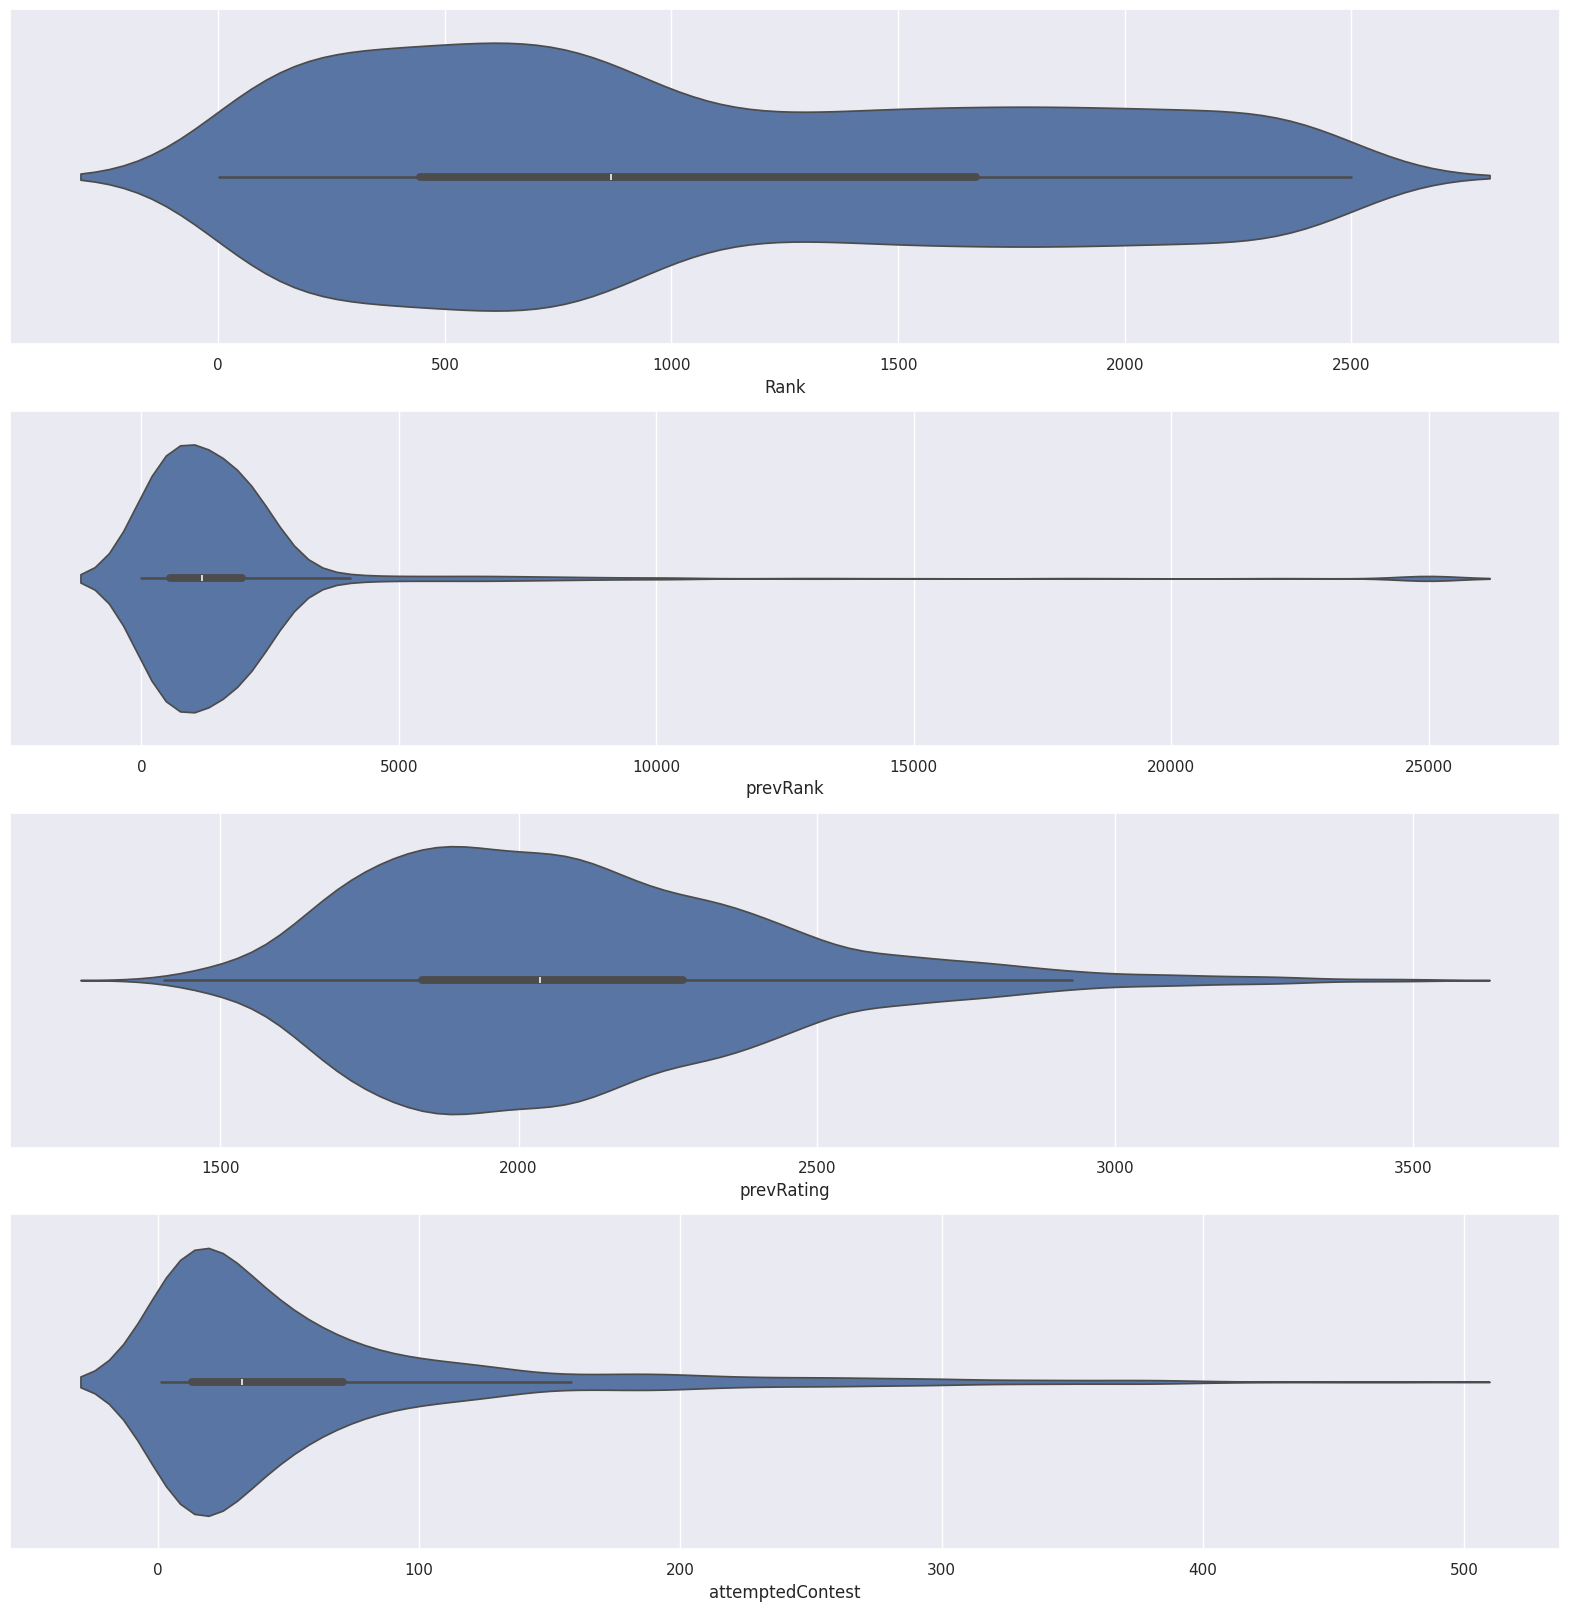

In [111]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.violinplot(x = 'Rank', data = df, ax = axes[0])
sns.violinplot(x = 'prevRank', data = df, ax = axes[1])
sns.violinplot(x = 'prevRating', data = df, ax = axes[2])
sns.violinplot(x = 'attemptedContest', data = df, ax = axes[3])

<Axes: xlabel='Score', ylabel='count'>

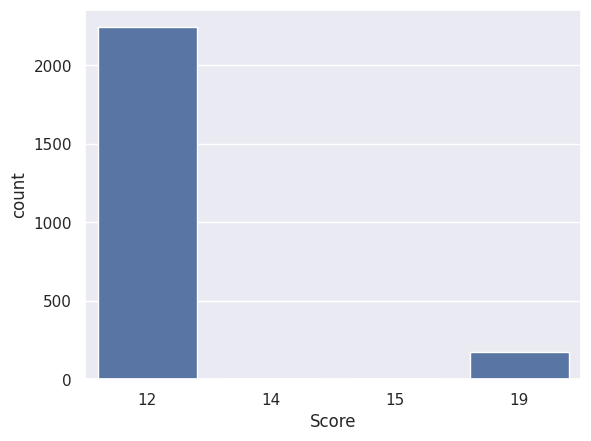

In [112]:
sns.countplot(x = 'Score', data = df)

<Axes: xlabel='ratingChange'>

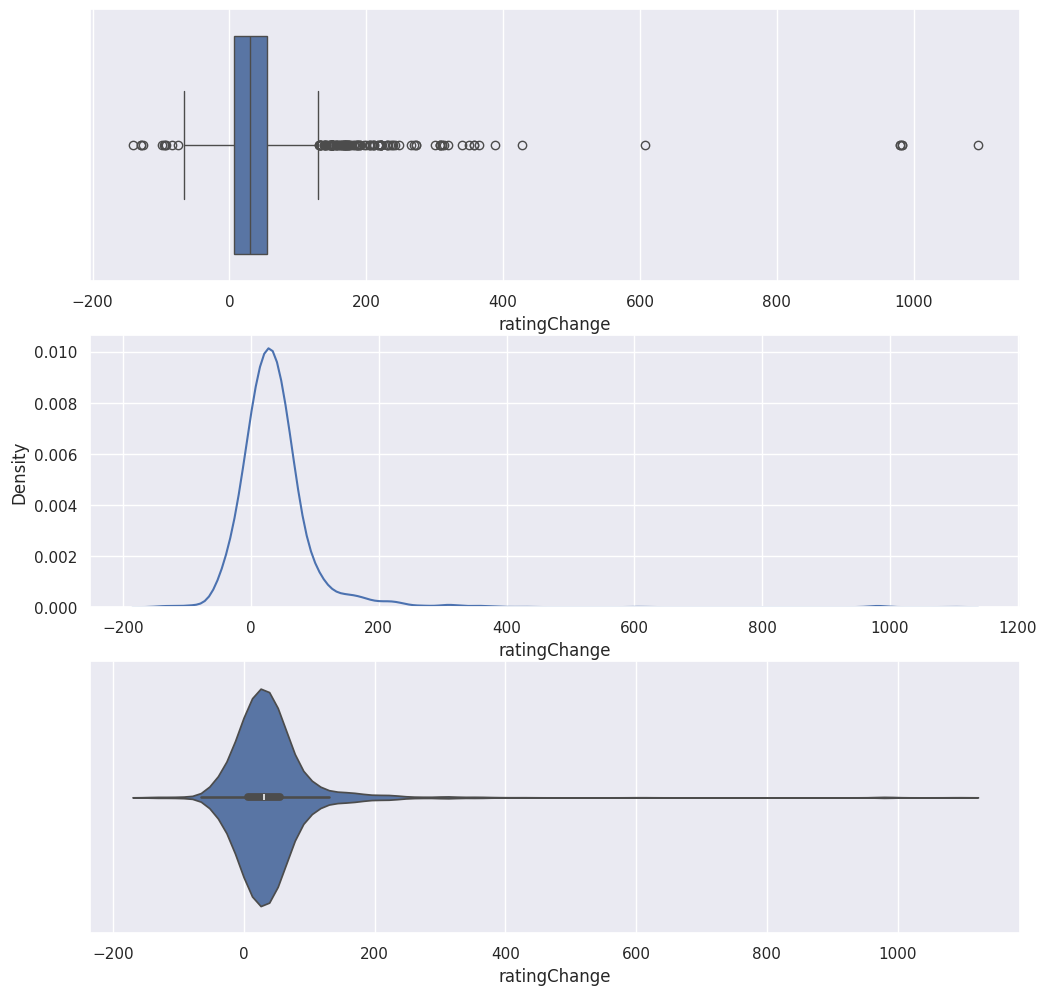

In [113]:
#Analyzing the target variable
fig, axes = plt.subplots(3,1, figsize = (12,12))
sns.boxplot(x = 'ratingChange', data = df, ax = axes[0])
sns.kdeplot(x = 'ratingChange', data = df, ax = axes[1])
sns.violinplot(x = 'ratingChange', data = df, ax = axes[2])

<Axes: >

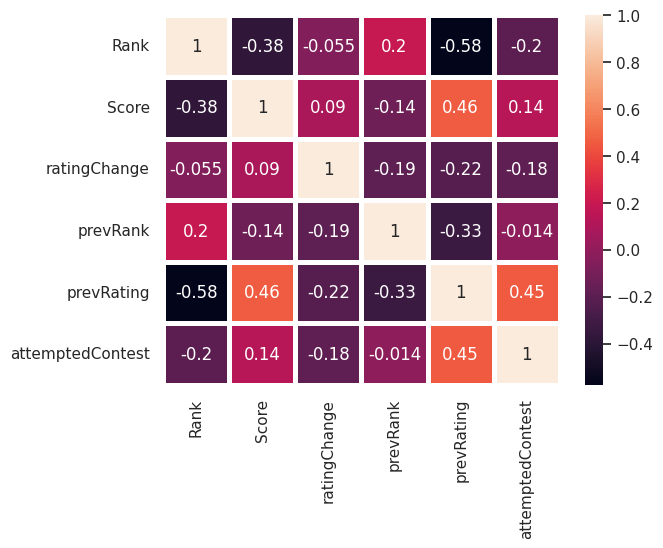

In [114]:
#Understanding Correlations
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 3.5)

<Axes: xlabel='attemptedContest', ylabel='ratingChange'>

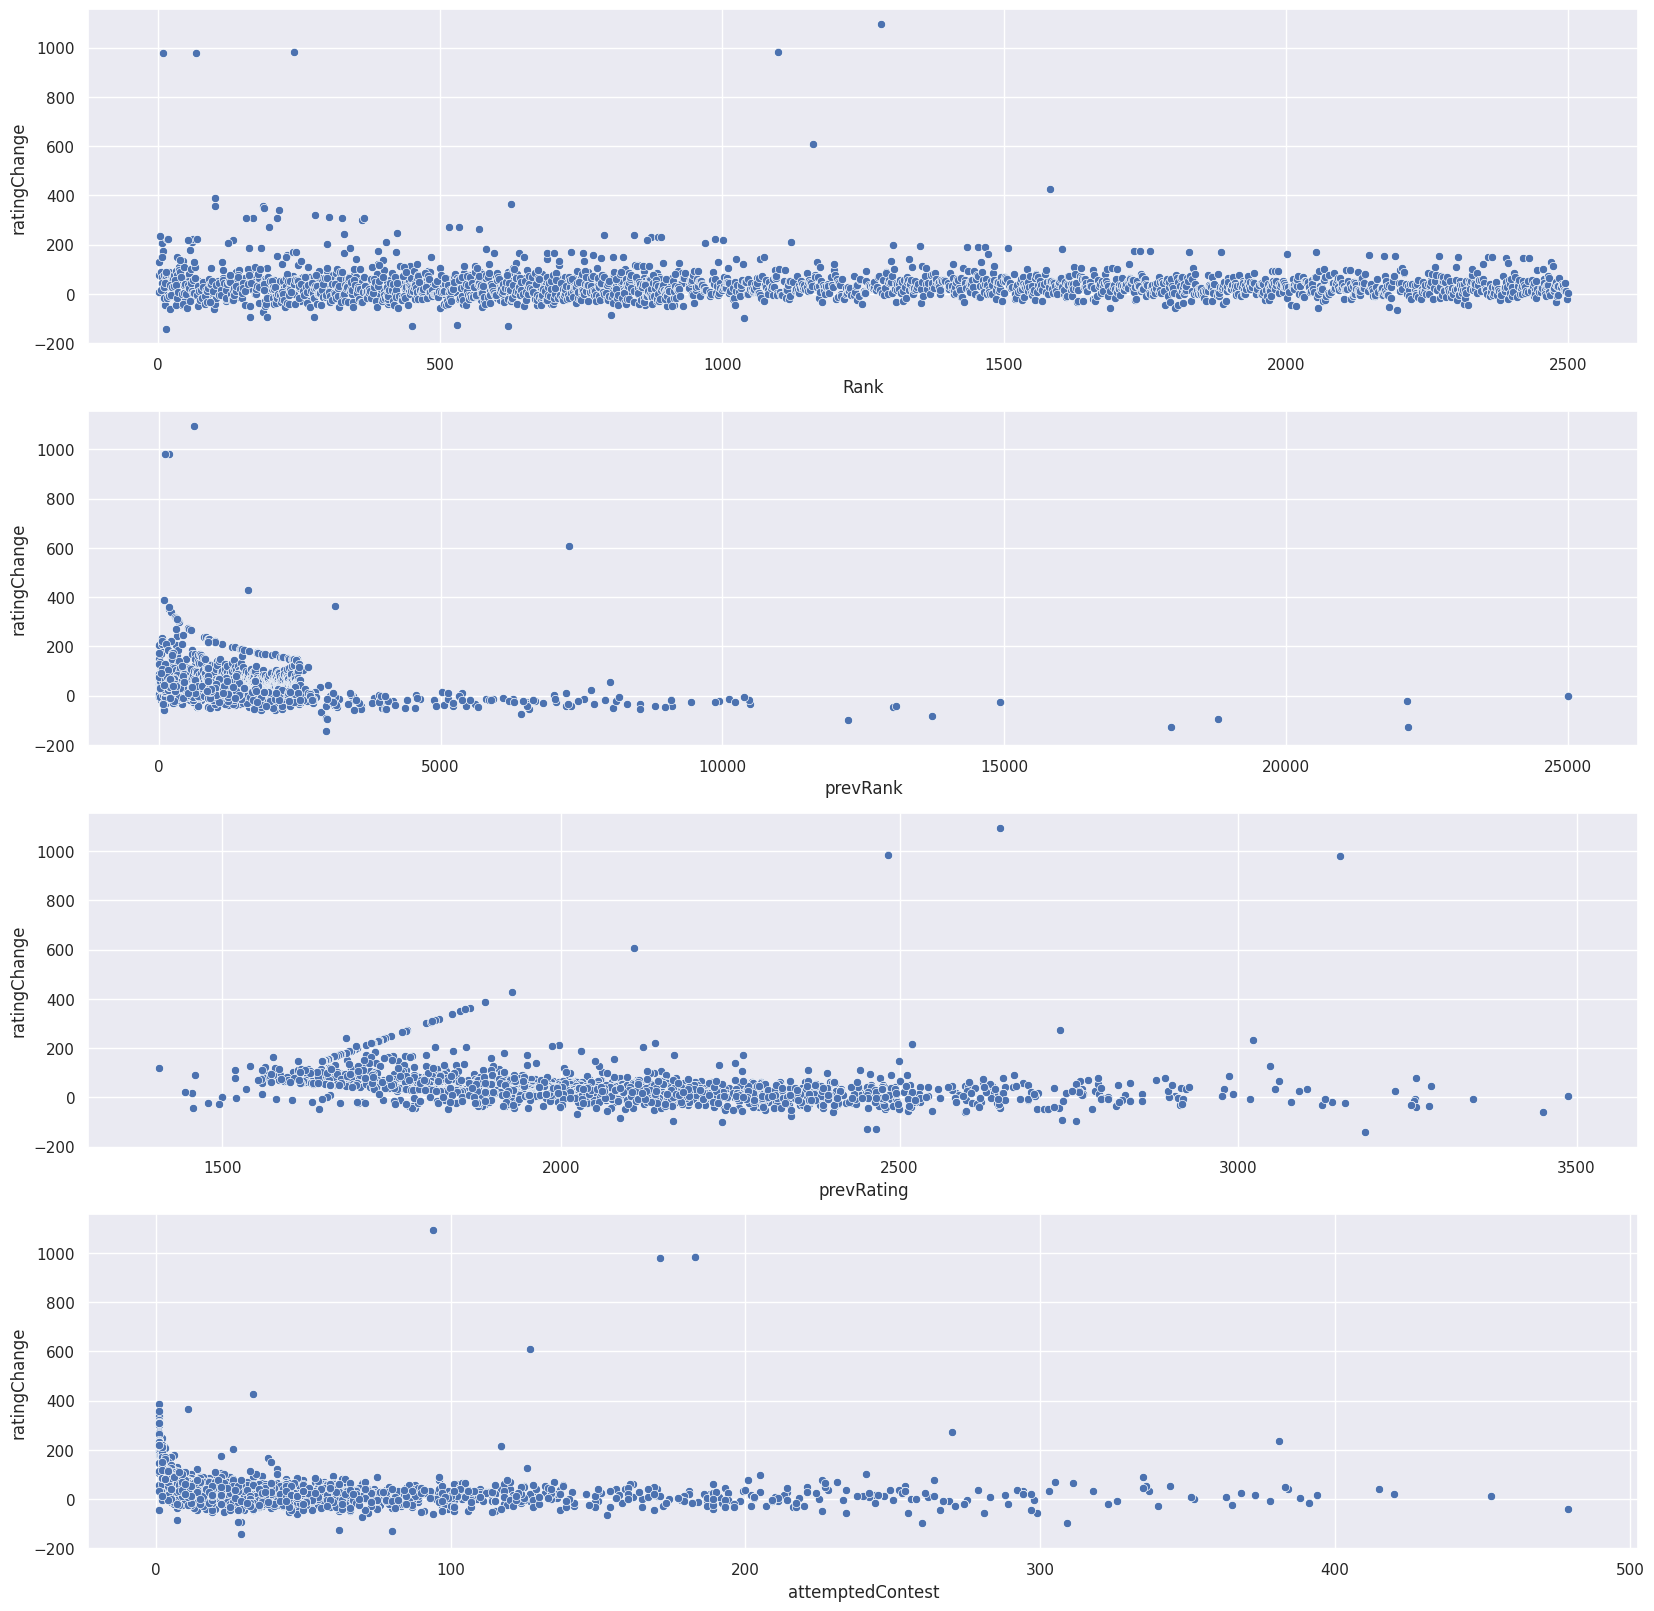

In [115]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
sns.scatterplot(x = 'Rank', y = 'ratingChange', data = df, ax = axes[0])
sns.scatterplot(x = 'prevRank', y = 'ratingChange',data = df, ax = axes[1])
sns.scatterplot(x = 'prevRating', y = 'ratingChange',data = df, ax = axes[2])
sns.scatterplot(x = 'attemptedContest', y = 'ratingChange', data = df, ax = axes[3])

In [116]:
#Handling outliers
'''for var in cols:
  q1 = df[var].quantile(q = 0.25)
  q3 = df[var].quantile(q = 0.75)
  iqr = q3 - q1
  low = q1 - 1.5*iqr
  high = q3 + 1.5*iqr
  df[var] = np.where(df[var]>high, q1, np.where(df[var]<low, q3, df[var]))'''

  #Capping outliers degrade the performance of the model, we shall keep them in dataset


'for var in cols:\n  q1 = df[var].quantile(q = 0.25)\n  q3 = df[var].quantile(q = 0.75)\n  iqr = q3 - q1\n  low = q1 - 1.5*iqr\n  high = q3 + 1.5*iqr\n  df[var] = np.where(df[var]>high, q1, np.where(df[var]<low, q3, df[var]))'

In [117]:
cols

Index(['Rank', 'Score', 'ratingChange', 'prevRank', 'prevRating',
       'attemptedContest'],
      dtype='object')

In [118]:
#feature Engineering
#df['rank-prevrank-diff'] = np.abs(df['Rank'] - df['prevRank'])
#df['score-rank-ratio'] = df['Score']/df['Rank']
#df['ratingChange'] = np.log(df['ratingChange'])

#feature engineering is not helpful

In [119]:
cols = df.columns

In [120]:
scl = StandardScaler()
scl_df = scl.fit_transform(df)
scl_df = pd.DataFrame(scl_df, columns = cols)

#Scaling is not helping improving the performance

In [121]:
'''x = scl_df.drop(['ratingChange'], axis = 1)
y = scl_df['ratingChange']'''

"x = scl_df.drop(['ratingChange'], axis = 1)\ny = scl_df['ratingChange']"

In [122]:
x = df.drop(['ratingChange'], axis = 1)
y = df['ratingChange']

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

In [124]:
reg1 = LinearRegression()
reg2 = SVR()
reg3 = KNeighborsRegressor()
reg4 = DecisionTreeRegressor()
reg5 = RandomForestRegressor()
reg6 = GradientBoostingRegressor()
reg7 = AdaBoostRegressor()
reg8 = XGBRegressor()

regressors = [reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8]

for var in regressors:
  var.fit(x_train, y_train)
  y_pred = var.predict(x_test)

  print(f"The metrics of the {var} is: \n")
  print(f" r2 score: {r2_score(y_test, y_pred)}")
  print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
  print(f"Root Mean sqaured Error : {np.sqrt(mean_squared_error(y_test, y_pred))}")
  print(f"The cross validation score is: {cross_val_score(var, x, y,  cv = 5, scoring = 'r2')}")
  print("\n")


The metrics of the LinearRegression() is: 

 r2 score: 0.16363694537224982
Mean Absolute Error : 26.233460824903503
Root Mean sqaured Error : 73.78444544489479
The cross validation score is: [ 0.15441199  0.08654593  0.3609231   0.03993245 -0.18545531]


The metrics of the SVR() is: 

 r2 score: 0.09671739505375632
Mean Absolute Error : 30.108527580911748
Root Mean sqaured Error : 76.67949091659692
The cross validation score is: [0.00594368 0.03884704 0.22845078 0.08727253 0.41074434]


The metrics of the KNeighborsRegressor() is: 

 r2 score: 0.4249772278752961
Mean Absolute Error : 14.83567107438017
Root Mean sqaured Error : 61.18006294518281
The cross validation score is: [ 0.40077929  0.16214944  0.55272831  0.36575313 -0.44039732]


The metrics of the DecisionTreeRegressor() is: 

 r2 score: 0.5382800366414031
Mean Absolute Error : 10.081345041322312
Root Mean sqaured Error : 54.822233332245105
The cross validation score is: [-0.66537124  0.43605112  0.69835673 -1.45530241 -9.0179

In [125]:
# xgb regressor, as they are giving best results for now

In [126]:
#fine tuning the model
'''param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8,]
   }

xgb_grid_search = GridSearchCV(reg8, param_grid, cv=5, scoring='r2', n_jobs = -1)
xgb_grid_search.fit(x_train, y_train)
best_xgb_params = xgb_grid_search.best_params_
best_xgb_model = xgb_grid_search.best_estimator_

print(best_xgb_params)
print(best_xgb_model)'''

#fine tuning didn't helped at all, infact the model was overfitting

"param_grid = {\n    'n_estimators': [100, 200, 300],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'max_depth': [3, 4, 5, 6, 8,]\n   }\n\nxgb_grid_search = GridSearchCV(reg8, param_grid, cv=5, scoring='r2', n_jobs = -1)\nxgb_grid_search.fit(x_train, y_train)\nbest_xgb_params = xgb_grid_search.best_params_\nbest_xgb_model = xgb_grid_search.best_estimator_\n\nprint(best_xgb_params)\nprint(best_xgb_model)"

In [133]:
#Building a Neural Network using Keras API of tensorflow
ann = Sequential([
    Dense(units = 32, input_shape = (5,), activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1, activation = 'linear')
])

In [144]:
#ann.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [145]:
#ann.fit(x_train, y_train, epochs = 30, batch_size =  32, validation_data = (x_test, y_test))

Epoch 1/30
61/61 [==============================] - 1s 6ms/step - loss: 6152.9561 - accuracy: 0.0047 - val_loss: 6840.6265 - val_accuracy: 0.0000e+00
Epoch 2/30
61/61 [==============================] - 0s 3ms/step - loss: 5244.2861 - accuracy: 0.0036 - val_loss: 6598.6172 - val_accuracy: 0.0000e+00
Epoch 3/30
61/61 [==============================] - 0s 3ms/step - loss: 5146.7178 - accuracy: 0.0067 - val_loss: 6662.3867 - val_accuracy: 0.0041
Epoch 4/30
61/61 [==============================] - 0s 3ms/step - loss: 5523.6802 - accuracy: 0.0078 - val_loss: 6647.8818 - val_accuracy: 0.0041
Epoch 5/30
61/61 [==============================] - 0s 3ms/step - loss: 4871.4404 - accuracy: 0.0052 - val_loss: 6494.6689 - val_accuracy: 0.0041
Epoch 6/30
61/61 [==============================] - 0s 3ms/step - loss: 4934.3799 - accuracy: 0.0067 - val_loss: 6533.9023 - val_accuracy: 0.0041
Epoch 7/30
61/61 [==============================] - 0s 3ms/step - loss: 5432.9512 - accuracy: 0.0036 - val_loss: 658

In [146]:
#After all of this analysis, we are choosing xgboost as the final model for now
reg8

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
#Saving the BEST  model
import pickle
with open('XGboost_leetcode.pkl', 'wb') as file:
    pickle.dump(reg8, file)